<a href="https://colab.research.google.com/github/skryu9607/KAIST_Auto_Scoopter/blob/master/generate_request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


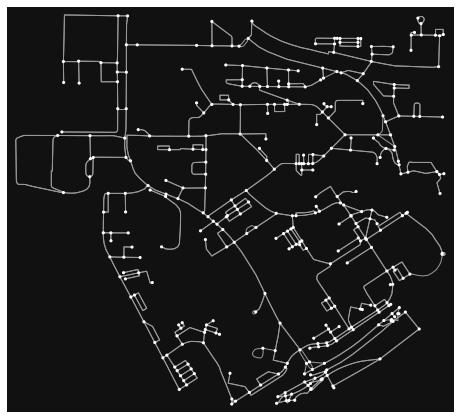

In [ ]:
import pandas as pd
import numpy as np
import csv
import random
NUM_REQUEST = 20 
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__
kaist = (36.3709,127.3613)

G = ox.graph_from_point(kaist, dist=750, network_type = "bike")
fig, ax = ox.plot_graph(G, node_size=10)

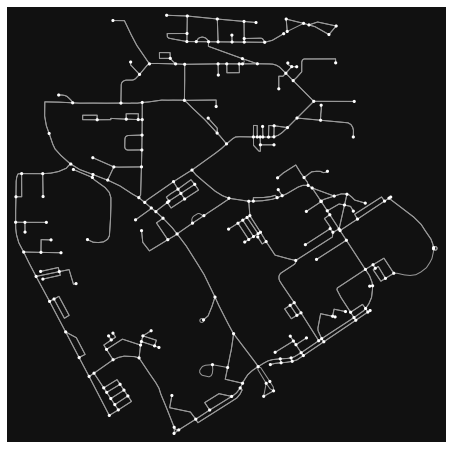

In [ ]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# print(gdf_nodes)
new_gdf = gdf_nodes
new_gdf1 = new_gdf[-0.5157593123218502 * new_gdf.x + new_gdf.y < -29.323675157711996]
G_new = G
for i in new_gdf1.index:
    try:
        G_new.remove_node(i)
    except:
        pass
   
new_gdf2 = new_gdf[-0.6590909090895878* new_gdf.x + new_gdf.y < -47.579106363468064]

for i in new_gdf2.index:
    try:
        G_new.remove_node(i)
    except:
        pass

new_gdf = gdf_nodes[gdf_nodes.x < 127.3564 ]
new_gdf = new_gdf[new_gdf.y > 36.37165]

for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass
    
new_gdf = gdf_nodes[gdf_nodes.y > 36.37588]
new_gdf
for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass
    
new_gdf = gdf_nodes
new_gdf2 = new_gdf[2.297872340464131* new_gdf.x + new_gdf.y > 329.0468246857673]
new_gdf2 = new_gdf2[new_gdf2.y > 36.37037]
for i in new_gdf2.index:
    try:
        G_new.remove_node(i)
    except:
        pass

new_gdf = gdf_nodes
new_gdf = new_gdf[new_gdf.y >36.37266]
new_gdf = new_gdf[new_gdf.y <36.37304]
new_gdf = new_gdf[new_gdf.x >127.36686]
new_gdf = new_gdf[new_gdf.x <127.36720]
for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass

G_new.remove_node(10093887420)    
fig, ax = ox.plot_graph(G_new, node_size=10)

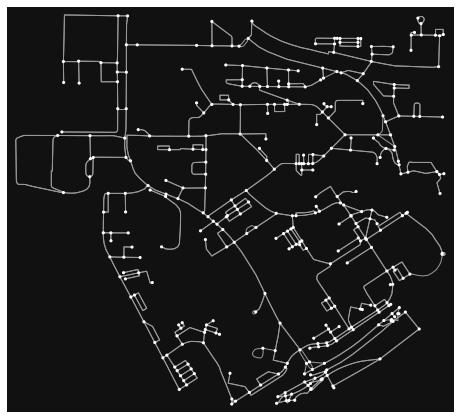

In [ ]:
kaist = (36.3709,127.3613)

G = ox.graph_from_point(kaist, dist=750, network_type = "bike")
fig, ax = ox.plot_graph(G, node_size=10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

nodd = list()
f = open('/content/drive/MyDrive/E-Scooter/for_test/kaist_node.csv','r')
n = csv.reader(f)
for row in n:
    nodd.append(row)
node = np.array(nodd[1:])

Node=node[:,0]
Node_yx = node[:,1:3]
Node_yx = Node_yx.astype(np.float)
Node_road_count = node[:,3]
f.close


<ipython-input-161-7a28c3f5e408>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Node_yx = Node_yx.astype(np.float)


<function TextIOWrapper.close()>

In [ ]:
Node

array(['277875336', '317557475', '317557510', '317557514', '317557515',
       '317557516', '317557519', '317557534', '317557535', '317557538',
       '317557612', '317557615', '317557616', '317557623', '317557625',
       '317557633', '317557634', '317557637', '317557642', '317557648',
       '317557651', '317557652', '317557655', '317557656', '317557670',
       '317557673', '352963031', '352963156', '352963165', '352963182',
       '352963189', '352963217', '352963275', '352963317', '352963331',
       '352963401', '910330593', '910330595', '917104038', '917104049',
       '917104096', '2060630060', '2074603279', '2204213101',
       '2290285064', '2292328365', '2292328367', '2292329732',
       '2292329733', '2292330391', '2292330392', '2292331317',
       '2292331321', '2292335706', '2292336709', '2292336712',
       '2292338854', '2292338857', '2292342537', '2292342538',
       '2292342539', '2292342540', '2292342541', '2292342978',
       '2292342979', '2292342980', '2292345422'

In [ ]:
osmid1 = '277875336'
start_idx = np.where(Node == osmid1)
print(start_idx)

(array([0]),)


In [ ]:

# ! kaist_edge.csv했을 때 name이 깨진다. 
nodd = list()
ff = open('/content/drive/MyDrive/E-Scooter/for_test/kaist_edge.csv','r',encoding='utf-8')
n = csv.reader(ff)
for row in n:
    nodd.append(row)
edge = np.array(nodd[1:])
# u,v,key,osmid,
# name,highway,oneway,
# reversed,length,lanes,
# geometry,maxspeed,access,
# service,bridge,junction
edge_u = edge[:,0]
edge_v = edge[:,1]
edge_len = edge[:,8]
edge_len = [float(s) for s in edge_len]
f.close

<function TextIOWrapper.close()>

In [ ]:
edge_u

array(['277875336', '277875336', '317557475', '317557475', '317557510',
       '317557510', '317557510', '317557514', '317557514', '317557514',
       '317557515', '317557515', '317557515', '317557516', '317557516',
       '317557516', '317557519', '317557519', '317557519', '317557534',
       '317557534', '317557534', '317557535', '317557535', '317557535',
       '317557535', '317557538', '317557538', '317557538', '317557612',
       '317557612', '317557612', '317557615', '317557615', '317557615',
       '317557616', '317557616', '317557616', '317557623', '317557623',
       '317557623', '317557625', '317557625', '317557625', '317557633',
       '317557633', '317557633', '317557633', '317557634', '317557634',
       '317557634', '317557634', '317557637', '317557637', '317557637',
       '317557642', '317557642', '317557642', '317557642', '317557648',
       '317557648', '317557648', '317557648', '317557651', '317557651',
       '317557651', '317557652', '317557652', '317557652', '3175

In [ ]:
def random_dates(start, end, n):
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.DatetimeIndex((10**9*np.random.randint(start_u, end_u, n, dtype=np.int64)).view('M8[ns]'))

In [ ]:
t_start = pd.to_datetime('2022-11-30')
t_end = pd.to_datetime('2022-12-01')
request = random_dates(t_start, t_end, NUM_REQUEST)

df_request = pd.DataFrame({})
df_request['Time'] = pd.DataFrame(request.sort_values())
df_request

,Time
0,2022-11-30 04:34:36
1,2022-11-30 05:35:56
2,2022-11-30 06:04:41
3,2022-11-30 06:12:12
4,2022-11-30 07:51:52
5,2022-11-30 09:03:00
6,2022-11-30 09:55:49
7,2022-11-30 14:03:41
8,2022-11-30 14:09:47
9,2022-11-30 15:02:42


### 고민해야할 것, Request 는 각 node에? 각 edge위에? 임의의 point에?

In [ ]:
# 예1
df_request_with_node = df_request.copy()
df_request_with_node['startnode'] = pd.DataFrame(['node'+str(random.randint(0,250)) for _ in range(NUM_REQUEST)])
df_request_with_node['endnode'] = pd.DataFrame(['node'+str(random.randint(0,250)) for _ in range(NUM_REQUEST)])
df_request_with_node

,Time,startnode,endnode
0,2022-11-30 04:34:36,node67,node117
1,2022-11-30 05:35:56,node42,node162
2,2022-11-30 06:04:41,node48,node156
3,2022-11-30 06:12:12,node20,node22
4,2022-11-30 07:51:52,node71,node198
5,2022-11-30 09:03:00,node145,node113
6,2022-11-30 09:55:49,node82,node113
7,2022-11-30 14:03:41,node201,node103
8,2022-11-30 14:09:47,node227,node229
9,2022-11-30 15:02:42,node219,node165


Request : each edge 위에

In [ ]:
# 예2)
df_request_with_edge = df_request.copy()
df_request_with_edge['startedge'] = pd.DataFrame(['edge'+str(random.randint(0,630)) for _ in range(NUM_REQUEST)])
df_request_with_edge['startpart'] = pd.DataFrame(['%0.1f'%random.random() for _ in range(NUM_REQUEST)])
df_request_with_edge['endedge'] = pd.DataFrame(['edge'+str(random.randint(0,630)) for _ in range(NUM_REQUEST)])
df_request_with_edge['endpart'] = pd.DataFrame(['%0.1f'%random.random() for _ in range(NUM_REQUEST)])
df_request_with_edge

,Time,startedge,startpart,endedge,endpart
0,2022-11-30 04:34:36,edge310,0.2,edge33,0.6
1,2022-11-30 05:35:56,edge319,0.3,edge390,0.3
2,2022-11-30 06:04:41,edge12,0.8,edge376,0.9
3,2022-11-30 06:12:12,edge258,0.7,edge499,0.2
4,2022-11-30 07:51:52,edge60,0.4,edge95,0.7
5,2022-11-30 09:03:00,edge524,0.1,edge225,0.0
6,2022-11-30 09:55:49,edge165,0.4,edge280,0.1
7,2022-11-30 14:03:41,edge501,0.4,edge384,0.9
8,2022-11-30 14:09:47,edge22,0.8,edge171,0.6
9,2022-11-30 15:02:42,edge37,0.9,edge444,0.4


In [ ]:
df_request_with_edge['startedge'][0]

'edge310'

In [ ]:
a = 'abcd123'
print(a[4:])
print(int(a[4:]))

123
123


### 이와 같이 request 에 필요한 데이터를 고민해서, 추가할 필요. 우선은 위치만 결정하고 거리로 점수 정해서 풀어보고, 추가적으로 확장

일단 필요한게 수요 예측
그리고 수요예측과 거리에 따른 reward.

In [ ]:
# LIST 1. 수요 예측하는 list 만들기
# 전체 스쿠터 댓수를 유지하면서
# 전체 edge 갯수 = 250
# Scoopter number is 100
# STATIONS = 10
NUM_REQUEST = 20
N = 100 
STATIONS = 10
Dem = []
Demand = []
for i in range(NUM_REQUEST):
    for j in range(STATIONS):
        demands = N * np.random.default_rng().dirichlet(np.ones(STATIONS),size=1)
        demands = [np.round(v) for v in demands]
        Dem.append(demands)
    Dem_ = np.asarray(Dem).reshape(-1,STATIONS)
    Dem = []
    Demand.append(Dem_)
Demand = np.array(Demand)
# 시간대에 따른 수요 <- 재배치에 쓰일 예정
print(Demand[2])

[[36.  3. 21.  3.  1.  3.  3. 28.  2.  1.]
 [ 2.  2. 25.  1.  1. 37. 16.  4.  8.  5.]
 [ 1.  6.  2.  3. 32.  7.  8.  4. 34.  3.]
 [10. 24.  8.  4.  6.  0.  1.  5. 38.  4.]
 [25.  4.  4.  1.  0.  1. 45.  7. 10.  3.]
 [ 5.  8. 12. 10. 13. 11. 15.  8.  6. 11.]
 [17.  9. 12. 20. 14.  1.  7.  0.  5. 15.]
 [ 6.  0. 24.  2.  8. 21.  4.  1. 12. 22.]
 [10.  2. 26. 10.  6. 21.  4.  3. 11.  7.]
 [ 8. 13. 13.  2. 24.  1. 15.  5. 10.  9.]]


In [ ]:
idx = np.random.choice(len(Node),STATIONS)
stations = Node[idx]
stations_yx = Node_yx[idx]


In [ ]:
stations

array(['2293592721', '352963031', '2293592722', '2331416522',
       '2294278714', '2331416652', '4627973422', '2294292531',
       '4937770619', '5437915825'], dtype='<U30')

In [ ]:
from haversine import haversine, Unit
# osmid1 , osmid2 <- should be string input.
def distances(osmid1,osmid2):
    # osmid1 : start node
    # osmid2 : destination node
    start_idx = np.where(Node == osmid1)
    start_yx = Node_yx[start_idx[0][0]]
    start_yx = list(map(float,start_yx))
    end_idx = np.where(Node == osmid2)
    end_yx = Node_yx[end_idx[0][0]]
    end_yx = list(map(float,end_yx))
    distance = haversine(start_yx, end_yx, unit = 'm')
    return distance

In [ ]:
distances('277875336','277875336')

0.0

In [ ]:
alpha = df_request_with_edge['endpart']
alpha[0]

'0.6'

In [ ]:
edge_len[527]

32.134

In [ ]:
float(alpha[0]) * edge_len[527]

19.2804

Finding the nearest station
1. END edge 확인
2. END edge에 해당하는 시작 node와 끝 node를 추출.
3. 시작 node에 가장 가까운 station 찾기, 끝 node에 가장 가까운 station 찾기 <- cost 함수 쓰기
4. 시작 node에서 가장 가까운 staiton 까지의 거리 + alpha * length VS 끝 node에서 가장 가까운 staiton 까지의 거리 + (1-alpha)* length

In [195]:
alpha = df_request_with_edge['endpart']
alpha[0]
for k in range(NUM_REQUEST):
  # Index of Endedge
  idx = df_request_with_edge['endedge'][k][4:] 
  idx = int(idx)
  print(idx)
  # Start node of endedge
  s_node_end_osmid = edge_u[idx]
  s_node_end_sta = []
  for i in range(STATIONS):
    # distances // Input : string, string / Output : float
    a = distances(s_node_end_osmid,stations[i])
    b = float(alpha[k]) * edge_len[idx]
    s_node_end_sta.append(a + b)
    s_node_end_sta_candidate_idx = np.argmin(s_node_end_sta)
  print(stations[s_node_end_sta_candidate_idx])
  # End node of endedge
  e_node_end_osmid = edge_v[idx]
  e_node_end_sta = []
  for i in range(STATIONS):
    # Distances // Input : string, string / Output : float
    a = distances(e_node_end_osmid, stations[i])
    b = (1.0 - float(alpha[k])) * edge_len[idx]
    e_node_end_sta.append(a + b)
    e_node_end_sta_candidate_idx = np.argmin(e_node_end_sta)
  print(stations[e_node_end_sta_candidate_idx])
  if np.min(e_node_end_sta) <= np.min(s_node_end_sta):
    comeback_stations = stations[e_node_end_sta_candidate_idx]
    comeback_benefit = np.min(e_node_end_sta)
    print('Pass through end node')
  else:
    comeback_stations = stations[s_node_end_sta_candidate_idx]
    comeback_benefit = np.min(s_node_end_sta)
    print('Pass through start node')
  print(comeback_stations)
  print(comeback_benefit)


33
5437915825
5437915825
Pass through end node
5437915825
189.3386846407242
390
2331416652
2331416652
Pass through start node
2331416652
198.3567271463724
376
2294278714
2294278714
Pass through end node
2294278714
8.427099999999998
499
5437915825
5437915825
Pass through end node
5437915825
315.08547399348856
95
2294278714
2294278714
Pass through end node
2294278714
416.56816334069555
225
2294278714
2294278714
Pass through start node
2294278714
144.93044441894762
280
4627973422
4627973422
Pass through start node
4627973422
274.44535544421984
384
2331416652
2331416652
Pass through end node
2331416652
137.02088480882645
171
352963031
352963031
Pass through start node
352963031
214.10361204247894
444
5437915825
5437915825
Pass through start node
5437915825
171.6793044995436
283
4627973422
4627973422
Pass through start node
4627973422
304.7897222318408
439
5437915825
5437915825
Pass through end node
5437915825
126.54247138154321
288
4627973422
4627973422
Pass through start node
4627973422
1

In [189]:
stations[9]

'5437915825'

이거는 현재 vehicles의 분포를 알려주는 것. (Random하게 시작합니다.)

In [ ]:
curr_vehicles = N * np.random.default_rng().dirichlet(np.ones(STATIONS),size=1)
curr_vehicles = [np.round(v) for v in curr_vehicles]

In [ ]:
curr_vehicles

[array([32.,  2., 12., 13.,  4., 19.,  3.,  4.,  3.,  8.])]

In [ ]:
def Reward(i,j,k):
    if (Demand[k][i][j] - curr_vehicles[j] ) == 1:
        return 20
    elif (Demand[k][i][j] - curr_vehicles[j] ) > 0:
        return +10
    else:
        return -1

In [ ]:
def benefit(i,j):
    

SyntaxError: ignored